In [28]:
import json
import os
from typing import Dict, List

import gym
import matplotlib.pyplot as plt
import moviepy.video.io.ImageSequenceClip
import numpy as np
from ray.rllib.agents.callbacks import DefaultCallbacks
from ray.rllib.env import BaseEnv
from ray.rllib.evaluation import Episode, RolloutWorker
from ray.rllib.policy import Policy


In [40]:
# results_dir = "/home/elias/ray_results/PPOTrainer_GoalLinesEnv_2022-05-25_11-43-58areldjlk_independent"
# results_dir = "/home/elias/ray_results/PPOTrainer_GoalLinesEnv_2022-05-25_11-43-59jh6rnikh_learning_progress"
# results_dir = "/home/elias/ray_results/PPOTrainer_GoalLinesEnv_2022-05-25_11-43-56p7xlacxb_centralized"
results_dir = "/home/elias/ray_results/PPOTrainer_GoalLinesEnv_2022-05-31_23-54-26a36bvscy_newlp"
# results_dir = "/home/elias/ray_results/PPOTrainer_GoalLinesEnv_2022-05-31_19-08-57c9c95us7_newlp_seed42"
result_dump = open(os.path.join(results_dir, "result.json"), "r")
agents = ["agent_0", "agent_1"]
goals = ["001", "010", "100", "011", "110", "101"]
alignment = {g: [] for g in goals}
agent_0_goal = {g: [] for g in goals}
agent_1_goal = {g: [] for g in goals}

aggregated_0 = {"individual": [], "collective": []}
aggregated_1 = {"individual": [], "collective": []}

for result in result_dump:
    metrics = json.loads(result).get("custom_metrics")
    if metrics is not None:
        aggregated_0["individual"].append(
            abs(metrics["lp agent_0 001_mean"]) +
            abs(metrics["lp agent_0 010_mean"]) +
            abs(metrics["lp agent_0 100_mean"])
        )
        aggregated_1["individual"].append(
            abs(metrics["lp agent_1 001_mean"]) +
            abs(metrics["lp agent_1 010_mean"]) +
            abs(metrics["lp agent_1 100_mean"])
        )
        aggregated_0["collective"].append(
            abs(metrics["lp agent_0 101_mean"]) +
            abs(metrics["lp agent_0 011_mean"]) +
            abs(metrics["lp agent_0 110_mean"])
        )
        aggregated_1["collective"].append(
            abs(metrics["lp agent_1 101_mean"]) +
            abs(metrics["lp agent_1 011_mean"]) +
            abs(metrics["lp agent_1 110_mean"])
        )
        for goal in goals:
            alignment[goal].append(abs(metrics[
                "lp agent_0 " + goal + "_mean"
            ] - metrics[
                "lp agent_1 " + goal + "_mean"
            ]))
            agent_0_goal[goal].append(metrics["lp agent_0 " + goal + "_mean"])
            agent_1_goal[goal].append(metrics["lp agent_1 " + goal + "_mean"])

Text(0.5, 0.98, 'Alignment')

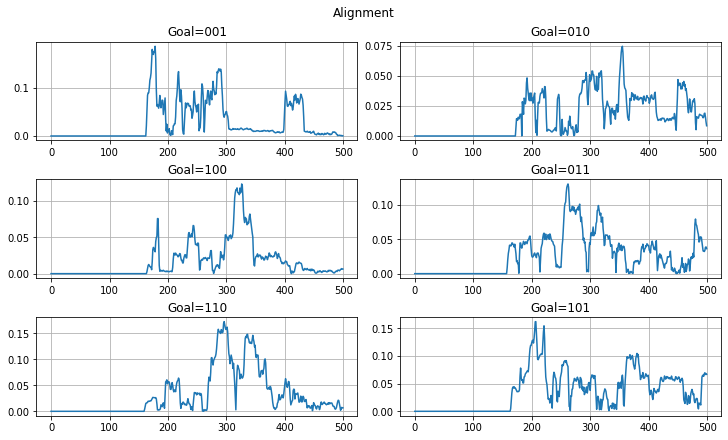

In [41]:
fig, axs = plt.subplots(3, 2, figsize=(10, 6), constrained_layout=True)
for ax, markevery in zip(axs.flat, alignment):
    ax.set_title(f'Goal={markevery}')
    ax.plot(alignment[markevery])
    ax.grid()
plt.suptitle("Alignment")

Text(0.5, 0.98, 'Agents LP')

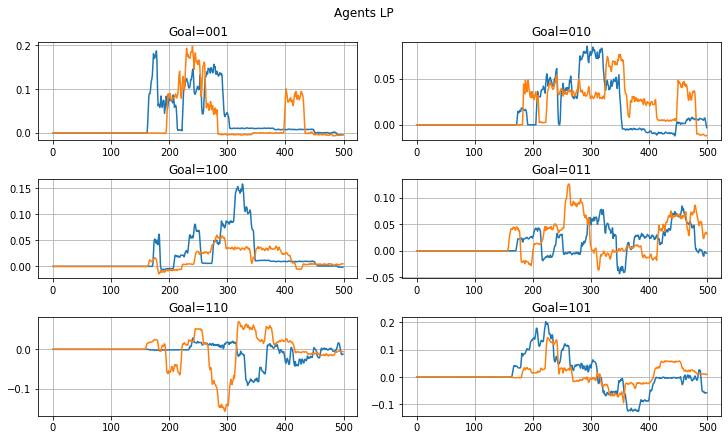

In [42]:
fig, axs = plt.subplots(3, 2, figsize=(10, 6), constrained_layout=True)
for ax, markevery in zip(axs.flat, agent_0_goal):
    ax.set_title(f'Goal={markevery}')
    ax.plot(agent_0_goal[markevery])
    ax.plot(agent_1_goal[markevery])
    ax.grid()
plt.suptitle("Agents LP")

Text(0.5, 0.98, 'Agents LP')

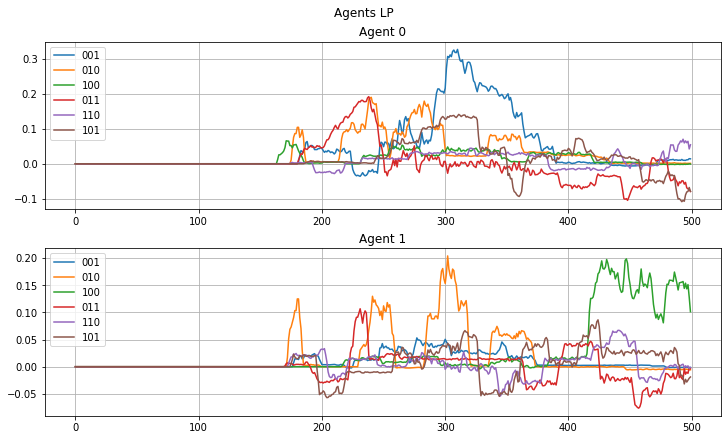

In [38]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), constrained_layout=True)

ax = axs[0]
ax.set_title("Agent 0")
for m in agent_0_goal:
    ax.plot(agent_0_goal[m])
ax.grid()
ax.legend(agent_0_goal.keys())

ax = axs[1]
ax.set_title("Agent 1")
for m in agent_1_goal:
    ax.plot(agent_1_goal[m])
ax.grid()
ax.legend(agent_1_goal.keys())

plt.suptitle("Agents LP")

Text(0.5, 0.98, 'Agents LP')

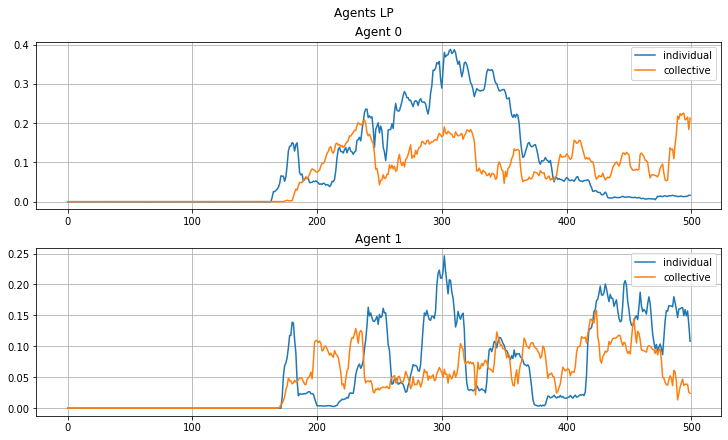

In [39]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), constrained_layout=True)

ax = axs[0]
ax.set_title("Agent 0")
for m in aggregated_0:
    ax.plot(aggregated_0[m])
ax.grid()
ax.legend(aggregated_0.keys())

ax = axs[1]
ax.set_title("Agent 1")
for m in aggregated_1:
    ax.plot(aggregated_1[m])
ax.grid()
ax.legend(aggregated_1.keys())

plt.suptitle("Agents LP")